## Bodyflow Demo

[<img src ="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" align="left">](https://colab.research.google.com/github/ITA-TECNOLOGIA/BodyFlow/tree/main/Bodyflow_Demo.ipynb)
<br>

Bodyflow leverages cutting-edge deep learning models for human pose estimation in 2D and 3D. Currently, we suggest some example [combinations](https://github.com/ITA-TECNOLOGIA/BodyFlow/tree/main/src/main/python/human_pose_estimation/models/README_models.md?ref_type=heads#example-combinations-and-their-use-cases):

 - MediaPipe (3D)
 - CPN (2D) + MHFormer (3D)
 - Lightweight Pose Estimation (2D) + VideoPose3D (3D)
 - CPN (2D) + MixSTE (3D)
 - CPN (2D) + ExPose (3D)

The CPN + MHFormer combination is explored in this sample notebook, to illustrate the use of BodyFlow in a widely-used service such as Google Colab. We start by cloning the github repository and installing all the dependencies, which isn't straightforward in colab, due to CUDA restrictions in the environment.

**T4 GPU environment should be used from this point on**

### First Dependencies Installation

In [1]:
! git clone https://github.com/ITA-TECNOLOGIA/BodyFlow.git
%cd BodyFlow

Cloning into 'BodyFlow'...
remote: Enumerating objects: 394, done.
remote: Counting objects: 100% (394/394), done.
remote: Compressing objects: 100% (262/262), done.
remote: Total 394 (delta 165), reused 337 (delta 109), pack-reused 0 (from 0)
Receiving objects: 100% (394/394), 1.56 MiB | 11.09 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/BodyFlow


In [2]:
!python --version

Python 3.10.12


In [3]:
%cd BodyFlow

[Errno 2] No such file or directory: 'BodyFlow'
/content/BodyFlow


In [4]:
!pip install -r src/main/python/requirements.txt

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 50.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of scikit-image to determine which version is compatible with other requirements. This could take a while.
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
INFO: pip is looking at multiple versions of 

### Final Dependencies and Models

Google Colab prompts us to reset the environment due to some core libraries being updated. We agree and allow it to restart.

In [1]:
%cd BodyFlow/

/content/BodyFlow


In [2]:
!sudo apt install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [4]:
!python src/main/python/human_pose_estimation/model_downloader.py

Downloading...
From (original): https://drive.google.com/uc?id=1kaznEDkcElFT2s_NmLDnJESvNa2RNplJ
From (redirected): https://drive.google.com/uc?id=1kaznEDkcElFT2s_NmLDnJESvNa2RNplJ&confirm=t&uuid=4b255565-d0a8-4fbe-84e2-e73be4996364
To: /content/BodyFlow/models/mhformer_model_351.pth
100% 126M/126M [00:02<00:00, 55.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1cV3vYx7uCFMu4D5NYvKqfMtL6OzQXTMA
From (redirected): https://drive.google.com/uc?id=1cV3vYx7uCFMu4D5NYvKqfMtL6OzQXTMA&confirm=t&uuid=7004add8-55b7-4732-810e-ba300d8c533c
To: /content/BodyFlow/models/mhformer_model_243.pth
100% 101M/101M [00:01<00:00, 63.5MB/s] 
Downloading...
From (original): https://drive.google.com/uc?id=1Qg7BcPpDGdrSQzezLFWRa9p9V-bxlWKo
From (redirected): https://drive.google.com/uc?id=1Qg7BcPpDGdrSQzezLFWRa9p9V-bxlWKo&confirm=t&uuid=a6182059-378e-478c-a94e-f4a2708e498d
To: /content/BodyFlow/models/mhformer_model_81.pth
100% 79.5M/79.5M [00:00<00:00, 118MB/s]
Downloading...
From (origin

In [5]:
!pip install tensorflow==2.12.0
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    Uninstalling gast-0.6.0:
      Successfully uninstalled gast-0.6.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.1
    Uninstalling google-auth-oauthlib-1.2.1:
      Successf

### Sample Video - Pose

Here we do a sample video pose processing, observing the output video with both CPN and MHFormer predictions.

In [6]:
!wget -O data/demos/colab_demo.mp4 https://videos.pexels.com/video-files/5738706/5738706-hd_1280_720_24fps.mp4

--2024-10-01 10:10:02--  https://videos.pexels.com/video-files/5738706/5738706-hd_1280_720_24fps.mp4
Resolving videos.pexels.com (videos.pexels.com)... 104.18.66.220, 104.18.67.220, 2606:4700::6812:43dc, ...
Connecting to videos.pexels.com (videos.pexels.com)|104.18.66.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2246046 (2.1M)
Saving to: ‘data/demos/colab_demo.mp4’

data/demos/colab_de 100%[===================>]   2.14M  --.-KB/s    in 0.04s   

2024-10-01 10:10:02 (59.3 MB/s) - ‘data/demos/colab_demo.mp4’ saved [2246046/2246046]



In [9]:
!python src/main/python/human_pose_estimation/inference_server.py --predictor_2d cpn --predictor_3d mhformer --input video --path data/demos/colab_demo.mp4

2024-10-01 10:10:11.804968: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-01 10:10:14.036332: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.
/content/BodyFlow/src/main/python/human_pose_estimation/models/predictors_2d/cpn/hrnet/lib/models/pose_hrnet.py:530: SyntaxWarning: "is" with a literal. Did you mean "=="?
  or self.pretrained_layers[0] is '*':
/content/B

In [10]:
from IPython.display import HTML
from base64 import b64encode

# Path to the video (update the path if needed)
video_path = '.viz_colab_demo.mp4'

# Function to display video in notebook
def show_video(video_path, video_width=600):
    video_file = open(video_path, "rb").read()
    video_url = "data:video/mp4;base64," + b64encode(video_file).decode()
    return HTML(f"""<video width="{video_width}" controls>
                      <source src="{video_url}" type="video/mp4">
                    </video>""")

# Display the video
show_video(video_path)


### Sample Video - Keypoints

Now, we show how to perform basic keypoint manipulation. Plotting a simple dummy requires to store all segments between joints, which are labeled intuitively in the processed log.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

In [12]:
# Load the CSV file
file_path = 'logs/Log_cpn_mhformer_colab_demo.csv'
df = pd.read_csv(file_path)

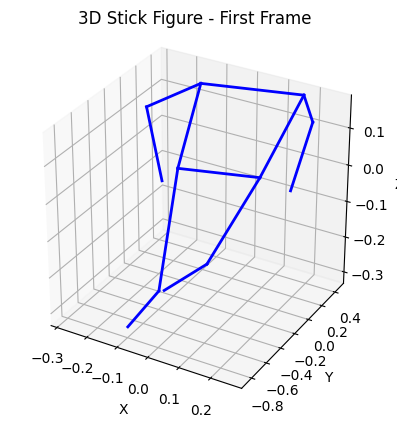

In [13]:
body_segments = [
    ("left_shoulder", "left_elbow"),
    ("left_elbow", "left_wrist"),
    ("right_shoulder", "right_elbow"),
    ("right_elbow", "right_wrist"),
    ("left_hip", "left_knee"),
    ("left_knee", "left_ankle"),
    ("right_hip", "right_knee"),
    ("right_knee", "right_ankle"),
    ("left_shoulder", "right_shoulder"),
    ("left_hip", "right_hip"),
    ("left_shoulder", "left_hip"),
    ("right_shoulder", "right_hip")
]

# Initialize a structure to hold the segments for all frames
frames_segments = []

# Iterate over each frame in the DataFrame
for index, row in df.iterrows():
    frame_segments = {}
    for segment in body_segments:
        start_joint, end_joint = segment
        # Extract coordinates for the start and end joints, and store segments
        start_x = row[f"{start_joint}.coordinate_x"]
        start_y = row[f"{start_joint}.coordinate_y"]
        start_z = row[f"{start_joint}.coordinate_z"]

        end_x = row[f"{end_joint}.coordinate_x"]
        end_y = row[f"{end_joint}.coordinate_y"]
        end_z = row[f"{end_joint}.coordinate_z"]

        frame_segments[f"{start_joint}-{end_joint}"] = ((start_x, start_y, start_z), (end_x, end_y, end_z))
    frames_segments.append(frame_segments)

# Plot the first frame using matplotlib
first_frame_segments = frames_segments[0]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for segment, ((start_x, start_y, start_z), (end_x, end_y, end_z)) in first_frame_segments.items():
    ax.plot([start_x, end_x], [-start_y, -end_y], [-start_z, -end_z], color='blue', linewidth=2) # Invert Y and Z to plot straight pose


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Stick Figure - First Frame')
ax.set_box_aspect([1,1,1])

plt.show()

### Sample Video - Human Activity Recognition (HAR)

For the current sample video, we utilize the Human Activity Recognition (HAR) module, specifically employing the Long Short-Term Memory (LSTM) model for activity prediction. The process involves several steps.

**Downloading Pre-trained Models**: Initially, we download the pre-trained HAR models available for use.

In [14]:
# Download the archive
!wget -O HAR_models.zip https://argon-docker.itainnova.es/repository/war/bodyflow/HAR/models/HAR_models.zip

# Extract the archive into the weights directory
!unzip HAR_models.zip -d src/main/python/human_activity_recognition/weights

--2024-10-01 10:12:50--  https://argon-docker.itainnova.es/repository/war/bodyflow/HAR/models/HAR_models.zip
Resolving argon-docker.itainnova.es (argon-docker.itainnova.es)... 193.144.226.60
Connecting to argon-docker.itainnova.es (argon-docker.itainnova.es)|193.144.226.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 841190684 (802M) [application/zip]
Saving to: ‘HAR_models.zip’

HAR_models.zip      100%[===================>] 802.22M  10.1MB/s    in 97s     

2024-10-01 10:14:29 (8.25 MB/s) - ‘HAR_models.zip’ saved [841190684/841190684]

Archive:  HAR_models.zip
  inflating: src/main/python/human_activity_recognition/weights/cnn_2d.pth  
  inflating: src/main/python/human_activity_recognition/weights/cnn_3d.pth  
  inflating: src/main/python/human_activity_recognition/weights/cnn_all.pth  
  inflating: src/main/python/human_activity_recognition/weights/lstm_2d.pth  
  inflating: src/main/python/human_activity_recognition/weights/lstm_3d.pth  
  inflating: s

**Input Data for the HAR Module**: The HAR module requires several inputs to process:

- Log Output from Human Pose Estimation (HPE): This provides the input data used in the activity recognition.
- Processed Video Output from HPE: The video that was processed through the HPE module, to get video output of activity recognition.
- Subject Identifier: The ID of the subject in the video, which helps the system focus on the correct individual for activity recognition.
- HAR Model of Choice: Choose the desired model.

In [18]:
!python src/main/python/human_activity_recognition/human_pose_estimation_inference.py --path_dataset 'logs/Log_cpn_mhformer_colab_demo.csv' --render_video '.colab_demo_processed.mp4' --viz 1 --har_model lstm --input_data 2d

RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/plugins/training_type/ddp.py:68: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import DistributedOptimizer
2024-10-01 10:21:17.234979: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-01

**Result Interpretation**: After processing, we extract the recognized activities from the output. For further analysis, we could for example compute the mode of the recognized activities, as this provides the most frequently detected activity.

In [26]:
# Read the har result and check motion
file_path = 'dataset_har.csv'
df = pd.read_csv(file_path)

mode_predictedHAR = df['predictedHAR'].mode()[0]
print("Mode of 'predictedHAR':", mode_predictedHAR)

Mode of 'predictedHAR': Walk
